<a href="https://colab.research.google.com/github/hisaom0419/my_python/blob/master/Reduction_analysis_20221028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
%pwd
%cd /content/drive/MyDrive/Colab Notebooks
%ls

/content/drive/MyDrive/Colab Notebooks
 1006-ASAHI-ADOPT-Raw-2.xlsx
 20210512_HSF1ts.xlsx
 20210713MGRMFL_fcy1SNUWT_op.xlsx
 AAA.xlsx
 aa_ratio_all.xlsx
 CY_SC-Ura_20221027.xlsx
 CY_SC-Ura_Cu_20221027.xlsx
 Df.xlsx
 Graph_20210427.pdf
 Graph_20210713_fcy1SNUWT_op.pdf
 green_file.xlsx
 Max_aa_list.csv
 MGRまとめ_221004.xlsx
 MGRまとめ_221005-2.xlsx
 MGRまとめ_221005.xlsx
 orf_coding_all.fasta
 PCA.ipynb
 PolyX_finder.ipynb
 PolyX_find.ipynb
 PolyX_FR_counter.ipynb
'python_tutorial_bioinfo_01 のコピー'
 Sample_sheet_CY_221027.xlsx
 Sample_sheet.xlsx
 SC_ORFs.fa
 SC_ORFs.txt
 Sc_ORFtrans.xlsx
 SC_ORF.txt
 SeqIO.ipynb
'Tecan(OD_FL1)_20210429.ipynb のコピー'
'Tecan(OD_FL1)_20210515最新版.ipynb のコピー'
'Tecan(OD_FL1)_20210515最新版.ipynb のコピー (1)'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb


In [53]:
#もしインストールしていないなら
#!pip install xlsxwriter
#!pip install umap-learn

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import pandas as pd
import seaborn as sns
from scipy import fftpack
import umap
from scipy.sparse.csgraph import connected_components
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#digits = load_digits()
#X, y = digits.data, digits.target


In [62]:
#データ読み込み(ver.1.0.0)

#----必須入力項目----
data_file = 'CY_SC-Ura_Cu_20221027.xlsx' #データシート
max_cycle = len(pd.read_excel(data_file).columns) #最大読み取りサイクル数
sample_file = 'Sample_sheet_CY_221027.xlsx' #サンプルシート
#graph_color = 'red' #グラフの色
#graph_file = 'Graph_20210713_fcy1SNUWT_op.pdf' #グラフの保存ファイル名
#writer = pd.ExcelWriter('20210713MGRMFL_fcy1SNUWT_op.xlsx', engine = 'xlsxwriter')
#最大蛍光値・MGRを保存するファイル
#----ここまで----

Sample = pd.read_excel(sample_file, index_col=0).to_dict()["Sample"]
length = len(Sample)

if length == 96:
  df_1 = pd.read_excel(data_file,index_col=0,skiprows=46,nrows=96,header=None,usecols=np.arange(0,max_cycle,1)).dropna(how='all',axis=1)
  df_2 = pd.read_excel(data_file,index_col=0,skiprows=46+96+5,nrows=96,header=None,usecols=np.arange(0,max_cycle,1)).dropna(how='all',axis=1)
  
else:
  df_1 = pd.read_excel(data_file,index_col=0,skiprows=47,nrows=length,header=None,usecols=np.arange(0,max_cycle,1))
  df_2 = pd.read_excel(data_file,index_col=0,skiprows=47+length+5,nrows=length,header=None,usecols=np.arange(0,max_cycle,1))


#ウェル番号とサンプル名をマルチインデックスにしたデータフレームの作成
df_1c = pd.concat([df_1,pd.read_excel(sample_file, index_col=0)], axis=1, join='inner').set_index('Sample',append=1)
df_2c = pd.concat([df_2,pd.read_excel(sample_file, index_col=0)], axis=1, join='inner').set_index('Sample',append=1)

# #df_1をプロット
#df_1c.T.plot(legend=0)
df_1c
# print(df_1)

,,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
,Sample,,,,,,,,,,,,,,,,,,,,,
A1,ATX1,0.1026,0.1106,0.1060,0.1093,0.1178,0.1205,0.1374,0.1449,0.1507,0.1683,...,0.9427,0.9412,0.9433,0.9411,0.9418,0.9423,0.9448,0.9435,0.9430,0.9424
A2,ATX1,0.1003,0.1133,0.1083,0.1067,0.1128,0.1257,0.1379,0.1493,0.1750,0.1937,...,0.9180,0.9160,0.9178,0.9154,0.9154,0.9142,0.9164,0.9159,0.9194,0.9154
A3,ATX1,0.0994,0.1104,0.1070,0.1052,0.1084,0.1175,0.1250,0.1424,0.1470,0.1798,...,0.9650,0.9640,0.9644,0.9681,0.9661,0.9665,0.9701,0.9685,0.9704,0.9686
A4,ATX1,0.1025,0.1134,0.1132,0.1117,0.1236,0.1302,0.1380,0.1522,0.1577,0.1780,...,0.9533,0.9512,0.9501,0.9459,0.9474,0.9465,0.9471,0.9459,0.9443,0.9457
A5,CUP1-1,0.1007,0.1095,0.1113,0.1126,0.1119,0.1213,0.1367,0.1467,0.1689,0.1829,...,0.9055,0.9053,0.9048,0.9030,0.9072,0.9051,0.9082,0.9080,0.9070,0.9097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H8,MAC1,0.0999,0.1117,0.1086,0.1131,0.1155,0.1227,0.1316,0.1555,0.1588,0.1799,...,0.9358,0.9365,0.9399,0.9382,0.9392,0.9368,0.9334,0.9319,0.9290,0.9267
H9,Blank,0.0814,0.0853,0.0863,0.0882,0.0858,0.0852,0.0842,0.0850,0.0847,0.0865,...,0.1597,0.1587,0.1584,0.1569,0.1549,0.1569,0.1554,0.1492,0.1506,0.1461
H10,Blank,0.0820,0.0849,0.0844,0.0843,0.0855,0.0862,0.0819,0.0834,0.0846,0.0876,...,0.1339,0.1611,0.1551,0.1593,0.1633,0.1513,0.1580,0.1564,0.1475,0.1428


In [60]:
# PCA
pca = PCA(n_components=2, random_state=0)
X_reduced_pca = pca.fit_transform(df_2c)

# t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_reduced_tsne = tsne.fit_transform(df_2c)

# UMAP
umap = umap.UMAP(n_components=2, random_state=0)
X_reduced_umap = umap.fit_transform(df_2c)
df_X_reduced_umap = pd.DataFrame(X_reduced_umap)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


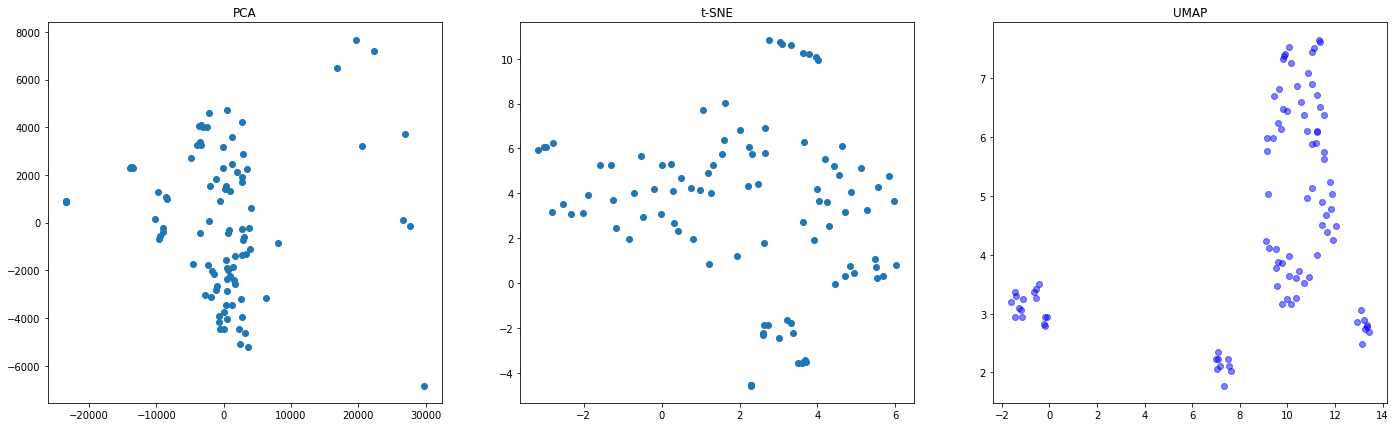

In [57]:
# 可視化
Figure = plt.figure(figsize=(24, 7))
ax1 = Figure.add_subplot(1,3,1)
ax2 = Figure.add_subplot(1,3,2)
ax3 = Figure.add_subplot(1,3,3)

ax1.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1])
#            c=y, cmap='jet', alpha=0.5)
ax2.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1])
#            c=y, cmap='jet', alpha=0.5)
ax3.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1],
             c="b", cmap='Spectral', alpha=0.5)

ax1.set_title("PCA")
ax2.set_title("t-SNE")
ax3.set_title("UMAP")

plt.show()